In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pyreadr
import pandas as pd
result = pyreadr.read_r('./data/children.rda')
children = result["children"]
children["group"] = ["A"]*4 + ["B"]*5 + ["C"]*5 +["D"]*4

In [3]:
from scientisttools.decomposition import CA
res_ca = CA(n_components=None,row_sup=list(range(14,18)),col_sup=list(range(5,8)),quali_sup=8)
res_ca.fit(children)

CA(col_sup=[5, 6, 7], n_components=4, quali_sup=[8], row_sup=[14, 15, 16, 17],
   row_weights=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

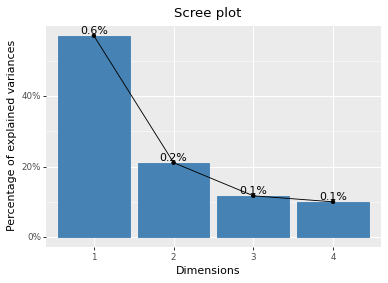

In [4]:
from scientisttools.ggplot import fviz_eigenvalue
p = fviz_eigenvalue(res_ca,add_labels=True)
print(p)

## Row factor map

### Color by RGB color

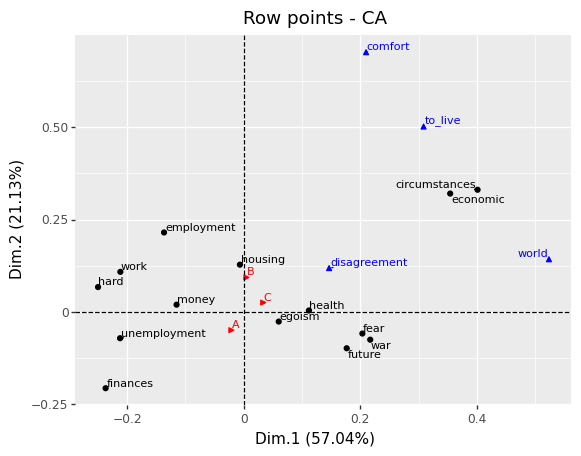

In [5]:
from scientisttools.ggplot import fviz_ca_row
p = fviz_ca_row(res_ca,repel=True)
print(p)

### Color by cos2

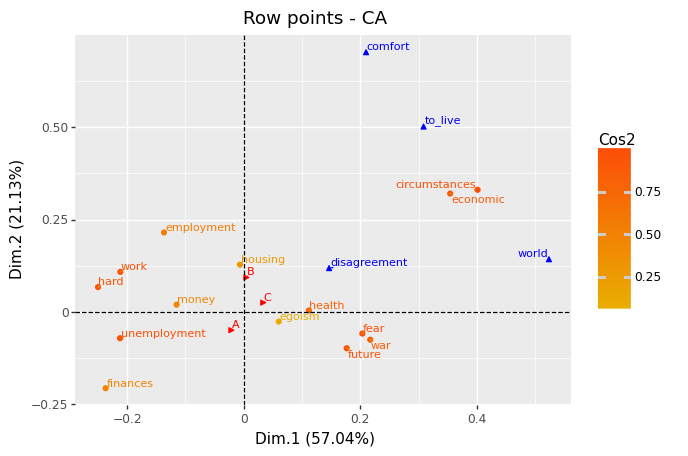

In [6]:
p = fviz_ca_row(res_ca,color="cos2",repel=True)
print(p)

### Color by contrib

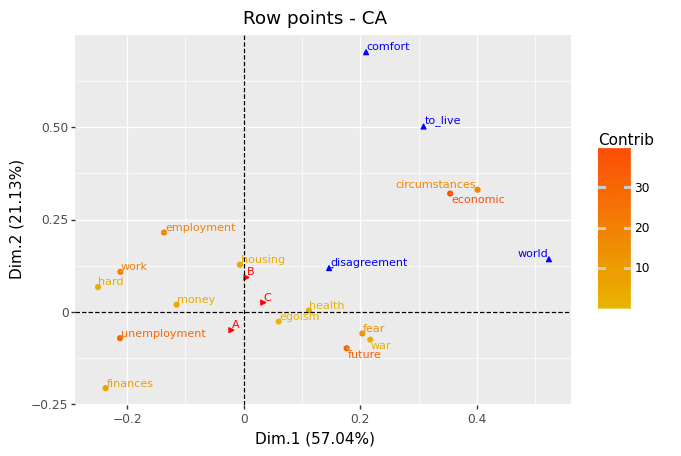

In [7]:
p = fviz_ca_row(res_ca,color="contrib",repel=True)
print(p)

### Color by quantitatives columns

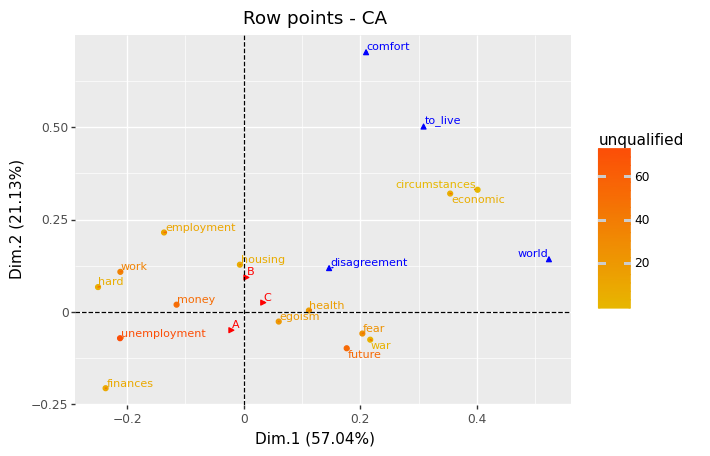

In [8]:
p = fviz_ca_row(res_ca,color="unqualified",repel=True)
print(p)

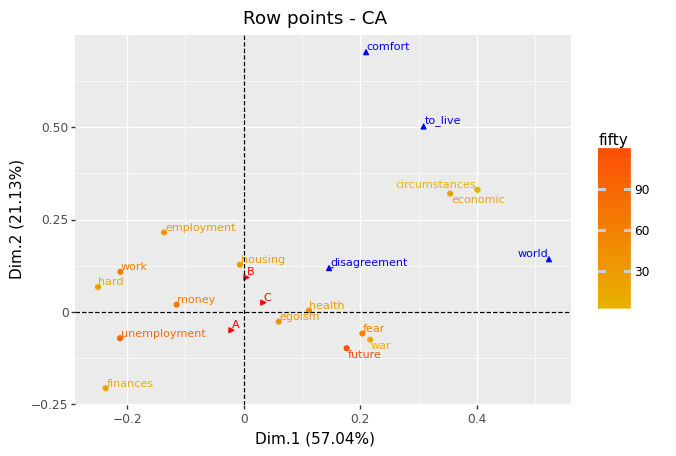

In [9]:
p = fviz_ca_row(res_ca,color="fifty",repel=True)
print(p)

### Color by numpy array

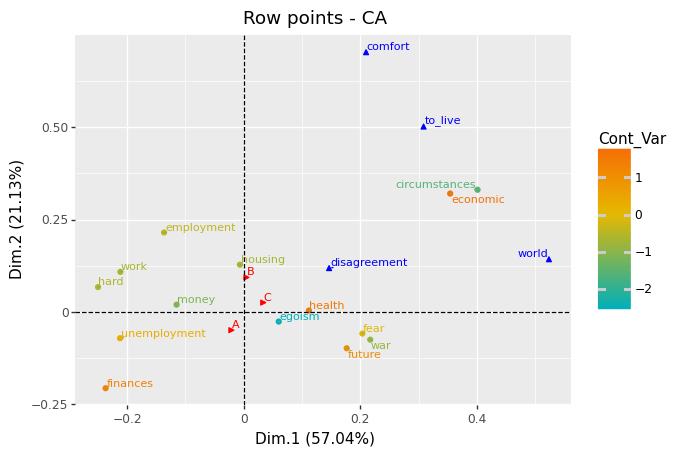

In [10]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_ca.call_["X"].shape[0])
p = fviz_ca_row(res_ca,color=color_numpy,repel=True)
print(p)

### Color by Kmeans

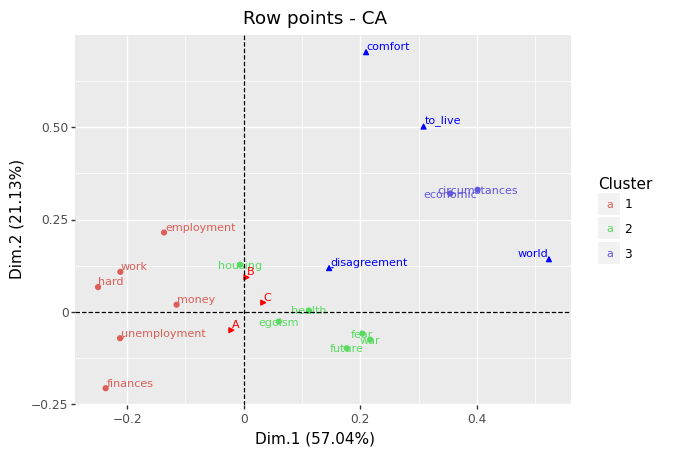

In [11]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_ca.row_["coord"])
p = fviz_ca_row(res_ca,color=kmeans,repel=True)
print(p)

### Color by qualitative

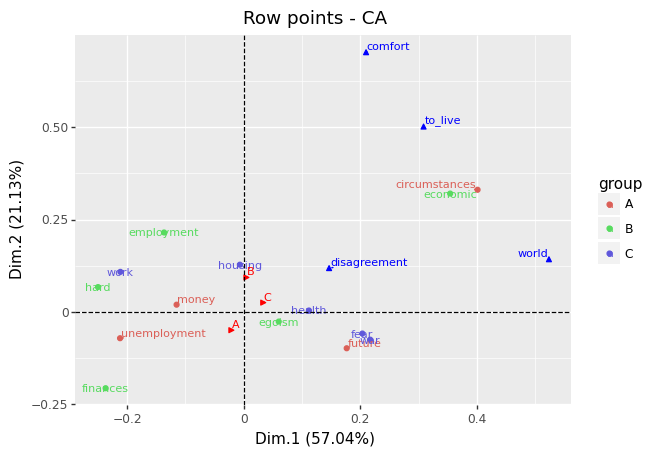

In [12]:
p = fviz_ca_row(res_ca,repel=True,habillage="group",add_ellipses=False)
print(p)

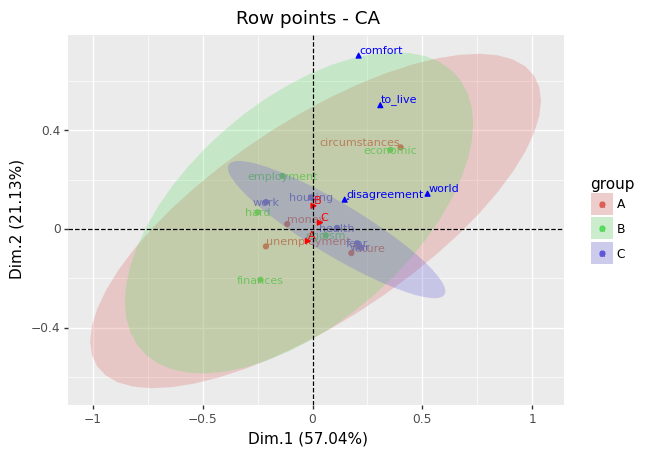

In [13]:
p = fviz_ca_row(res_ca,repel=True,habillage="group",add_ellipses=True)
print(p)

### Set limits

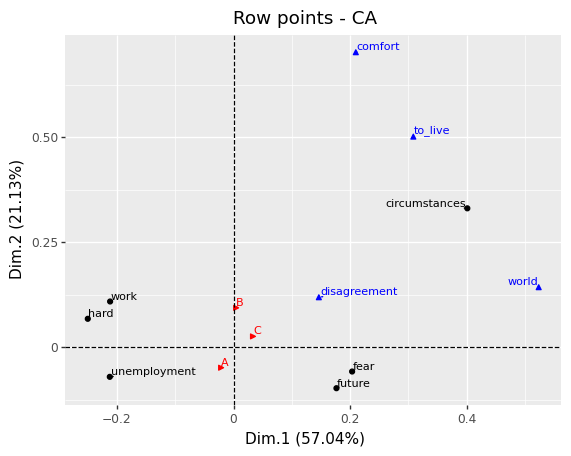

In [14]:
p = fviz_ca_row(res_ca,repel=True,lim_cos2=0.9)
print(p)

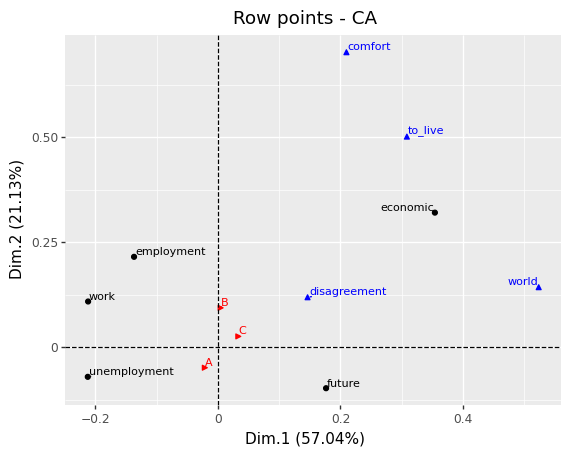

In [15]:
p = fviz_ca_row(res_ca,repel=True,lim_contrib=20)
print(p)

## Columns Factor Map

### Color by RGB

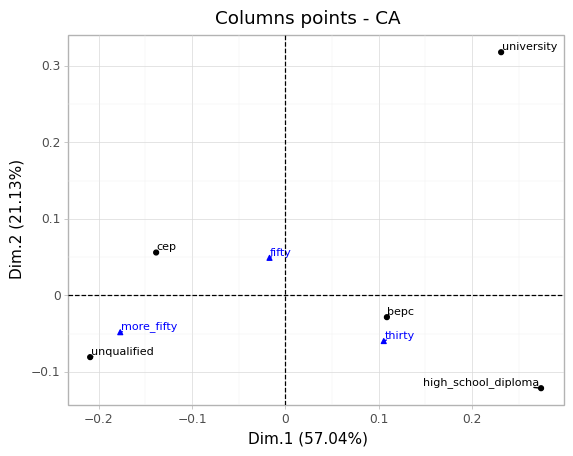

In [16]:
from scientisttools.ggplot import fviz_ca_col
p = fviz_ca_col(res_ca,repel=True)
print(p)

### Color by numpy array

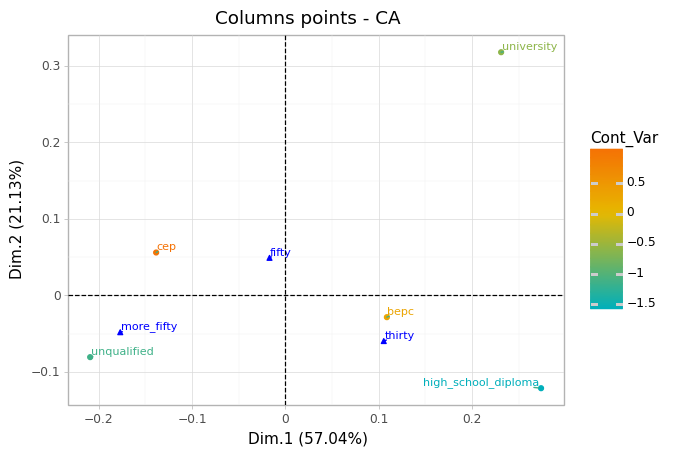

In [17]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_ca.call_["X"].shape[1])
p = fviz_ca_col(res_ca,color=color_numpy,repel=True)
print(p)

### Color by kmeans

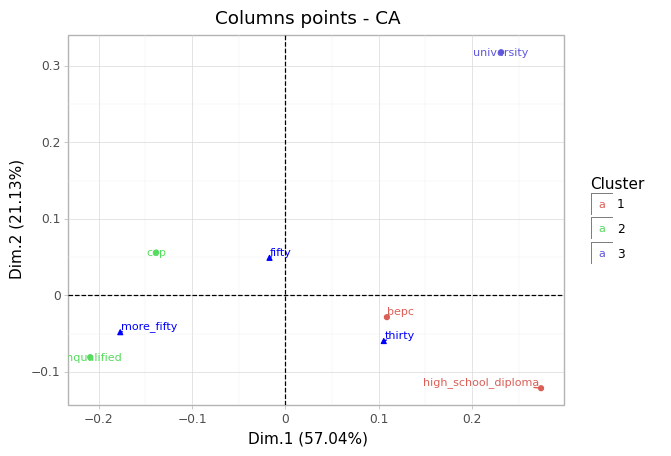

In [18]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_ca.col_["coord"])
p = fviz_ca_col(res_ca,color=kmeans,repel=True)
print(p)

## Biplot

In [ ]:
from scientisttools.ggplot import fviz_ca_biplot
p = fviz_ca_biplot(res_ca)
print(p)